In [8]:
# Install dependencies:
# pip install gym torch numpy matplotlib

import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [10]:
pip install gymnasium

  Using cached gymnasium-1.1.1-py3-none-any.whl (965 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install torch

Note: you may need to restart the kernel to use updated packages.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
# Define policy network (outputs action probabilities)
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
            nn.Softmax(dim=-1)  # FIXED
        )

    def forward(self, x):
        return self.fc(x)

In [14]:
# Environment setup
env = gym.make("CartPole-v1")
obs_dim = env.observation_space.shape[0]
print(env.observation_space)
print("obs_dim", obs_dim)
n_actions = env.action_space.n
print("Action space ",env.action_space)

policy_net = PolicyNetwork(obs_dim, n_actions)
optimizer = optim.Adam(policy_net.parameters(), lr=1e-2)

gamma = 0.99
episodes = 1000
reward_history = []

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
obs_dim 4
Action space  Discrete(2)


0
Episode 395, Total Reward: 306.0
Episode 396, Total Reward: 331.0
Episode 397, Total Reward: 334.0
Episode 398, Total Reward: 302.0
Episode 399, Total Reward: 350.0
Episode 400, Total Reward: 345.0
Episode 401, Total Reward: 405.0
Episode 402, Total Reward: 500.0
Episode 403, Total Reward: 500.0
Episode 404, Total Reward: 500.0
Episode 405, Total Reward: 500.0
Episode 406, Total Reward: 500.0
Episode 407, Total Reward: 500.0
Episode 408, Total Reward: 500.0
Episode 409, Total Reward: 500.0
Episode 410, Total Reward: 500.0
Episode 411, Total Reward: 500.0
Episode 412, Total Reward: 500.0
Episode 413, Total Reward: 500.0
Episode 414, Total Reward: 500.0
Episode 415, Total Reward: 500.0
Episode 416, Total Reward: 500.0
Episode 417, Total Reward: 500.0
Episode 418, Total Reward: 500.0
Episode 419, Total Reward: 500.0
Episode 420, Total Reward: 500.0
Episode 421, Total Reward: 500.0
Episode 422, Total Reward: 500.0
Episode 423, Total Reward: 500.0
Episode 424, Total Reward: 500.0
Episode 

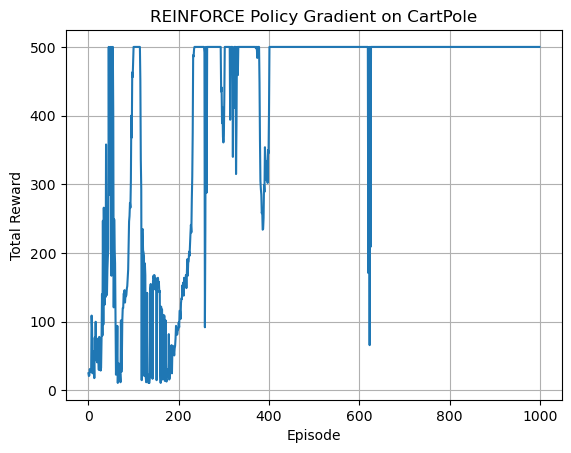

In [15]:
for episode in range(episodes):
    state = env.reset()[0]
    log_probs = []
    rewards = []

    while True:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)

        probs = policy_net(state_tensor).squeeze(0)
        
        dist = torch.distributions.Categorical(probs)
        

        action = dist.sample()

        log_probs.append(dist.log_prob(action))

        next_state, reward, terminated, truncated, _ = env.step(action.item())
        done = terminated or truncated

        rewards.append(reward)
        state = next_state

        if done:
            break

    # Compute returns
    returns = []
    G = 0
    for r in reversed(rewards):
        G = r + gamma * G
        returns.insert(0, G)

    returns = torch.FloatTensor(returns)

    # Normalize
    returns = (returns - returns.mean()) / (returns.std() + 1e-9)

    # Compute loss
    loss = []
    for log_prob, G in zip(log_probs, returns):
        loss.append(-log_prob * G)
    loss = torch.stack(loss).sum()

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    reward_history.append(sum(rewards))
    print(f"Episode {episode+1}, Total Reward: {sum(rewards)}")
    # Plot Learning Curve # ------------------------------------------- #
plt.plot(reward_history)
plt.xlabel("Episode") 
plt.ylabel("Total Reward") 
plt.title("REINFORCE Policy Gradient on CartPole") 
plt.grid(True) 
plt.show()

: 500.0
Episode 4413, Total Reward: 500.0
Episode 4414, Total Reward: 500.0
Episode 4415, Total Reward: 500.0
Episode 4416, Total Reward: 500.0
Episode 4417, Total Reward: 500.0
Episode 4418, Total Reward: 500.0
Episode 4419, Total Reward: 500.0
Episode 4420, Total Reward: 500.0
Episode 4421, Total Reward: 500.0
Episode 4422, Total Reward: 500.0
Episode 4423, Total Reward: 500.0
Episode 4424, Total Reward: 500.0
Episode 4425, Total Reward: 500.0
Episode 4426, Total Reward: 500.0
Episode 4427, Total Reward: 500.0
Episode 4428, Total Reward: 500.0
Episode 4429, Total Reward: 500.0
Episode 4430, Total Reward: 500.0
Episode 4431, Total Reward: 500.0
Episode 4432, Total Reward: 500.0
Episode 4433, Total Reward: 500.0
Episode 4434, Total Reward: 500.0
Episode 4435, Total Reward: 500.0
Episode 4436, Total Reward: 500.0
Episode 4437, Total Reward: 500.0
Episode 4438, Total Reward: 500.0
Episode 4439, Total Reward: 500.0
Episode 4440, Total Reward: 500.0
Episode 4441, Total Reward: 500.0
Episod

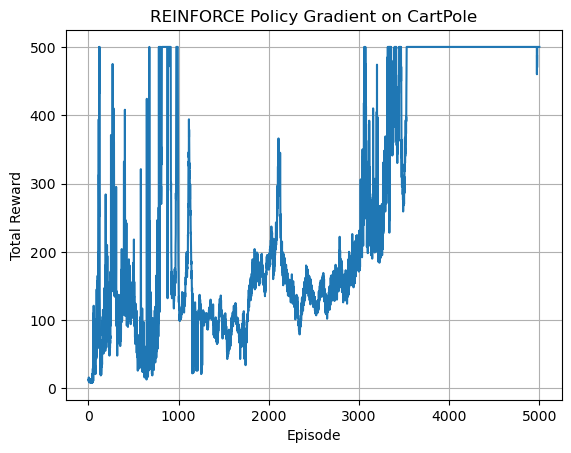

In [17]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define policy network (outputs action probabilities)
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
            nn.Softmax(dim=-1)  # Outputs action probabilities
        )

    def forward(self, x):
        return self.fc(x)

# Environment setup
env = gym.make("CartPole-v1")
obs_dim = env.observation_space.shape[0]
n_actions = env.action_space.n

policy_net = PolicyNetwork(obs_dim, n_actions)
optimizer = optim.Adam(policy_net.parameters(), lr=1e-2)

gamma = 0.99
episodes = 500
reward_history = []

for episode in range(episodes):
    state = env.reset()[0]
    log_probs = []
    rewards = []

    while True:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        probs = policy_net(state_tensor).squeeze(0)
        dist = torch.distributions.Categorical(probs)
        action = dist.sample()

        log_probs.append(dist.log_prob(action))
        next_state, reward, terminated, truncated, _ = env.step(action.item())
        done = terminated or truncated

        rewards.append(reward)
        state = next_state

        if done:
            break

    # Compute returns
    returns = []
    G = 0
    for r in reversed(rewards):
        G = r + gamma * G
        returns.insert(0, G)

    returns = torch.FloatTensor(returns)

    # Normalize
    returns = (returns - returns.mean()) / (returns.std() + 1e-9)

    # Compute loss
    loss = []
    for log_prob, G in zip(log_probs, returns):
        loss.append(-log_prob * G)
    loss = torch.stack(loss).sum()

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    reward_history.append(sum(rewards))
    print(f"Episode {episode+1}, Total Reward: {sum(rewards)}")

# Plot Learning Curve
plt.plot(reward_history)
plt.xlabel("Episode") 
plt.ylabel("Total Reward") 
plt.title("REINFORCE Policy Gradient on CartPole") 
plt.grid(True) 
plt.show()
